# RQ4 validation plots

Carga el parquet final y genera dos gráficas:
1) `validation_present` vs `author_type`
2) `validation_type` vs `author_type`


In [8]:

from pathlib import Path
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

PARQUET_PATH = Path('/Users/antoniozhong/Documents/dev/purdue/MSR2026/github_perf_patch_study/RQ4_test_and_validation/final_data/rq4_validation_evidence_final.parquet')

palette_pastel = ['#A3C4F3', '#C1E1C1', '#E2C2FF', '#B5E2FA']
sns.set_theme(style='whitegrid', palette=palette_pastel)
plt.rcParams.update({
    'axes.titlesize': 14,
    'axes.labelsize': 12,
    'legend.title_fontsize': 11,
    'legend.fontsize': 10,
})


final_df = pd.read_parquet(PARQUET_PATH)
print(f"Row: {len(final_df):,}")
print(f"Column: {list(final_df.columns)}")

final_df['author_type'] = final_df['author_type'].astype(str).str.strip().str.lower()
final_df['validation_type'] = final_df['validation_type'].astype(str).str.strip().str.lower()
final_df['validation_present'] = final_df['validation_present'].astype(bool)


Row: 407
Column: ['pr_id', 'author_type', 'repo', 'pr_number', 'pr_title', 'pipeline_names', 'validation_present', 'evidence_sources', 'validation_type', 'validation_description', 'pipeline_signal', 'description_signal', 'comment_signal']


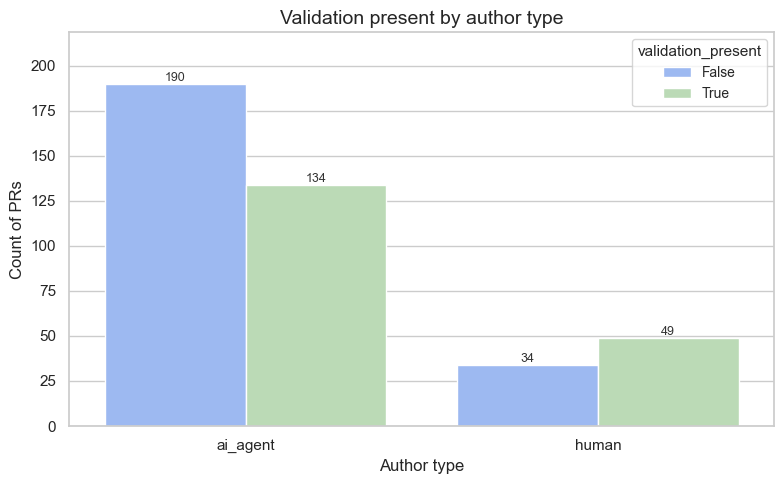

In [9]:

palette_present = {False: '#8FB4FF', True: '#B7E0B0'}

present_counts = (
    final_df
    .groupby(['author_type', 'validation_present'])
    .size()
    .reset_index(name='count')
)

order_author = (
    present_counts.groupby('author_type')['count'].sum().sort_values(ascending=False).index
)

fig, ax = plt.subplots(figsize=(8, 5))
sns.barplot(
    data=present_counts,
    x='author_type',
    y='count',
    hue='validation_present',
    order=order_author,
    hue_order=[False, True],
    palette=palette_present,
    ax=ax,
)
ax.set_title('Validation present by author type')
ax.set_xlabel('Author type')
ax.set_ylabel('Count of PRs')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ['False', 'True'], title='validation_present', frameon=True)
ax.set_ylim(0, present_counts['count'].max() * 1.15)

for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f"{int(height)}", (p.get_x() + p.get_width() / 2, height),
                    ha='center', va='bottom', fontsize=9, color='#333')

plt.tight_layout()
plt.show()


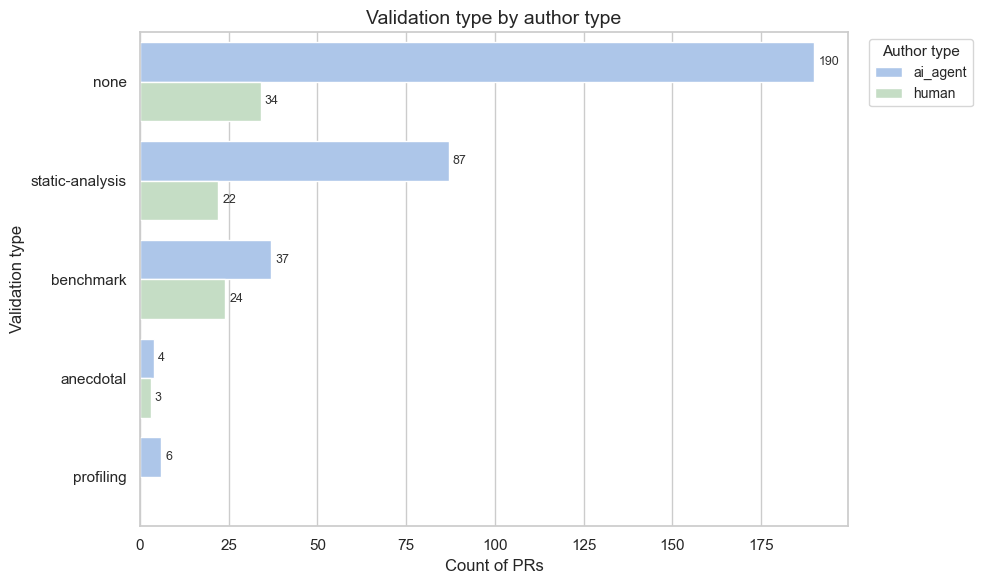

In [10]:


valtype_counts = (
    final_df
    .groupby(['validation_type', 'author_type'])
    .size()
    .reset_index(name='count')
)


TOP_N = 12
valtype_order = (
    valtype_counts.groupby('validation_type')['count']
    .sum()
    .sort_values(ascending=False)
    .head(TOP_N)
    .index
)
valtype_counts = valtype_counts[valtype_counts['validation_type'].isin(valtype_order)]

fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(
    data=valtype_counts,
    y='validation_type',
    x='count',
    hue='author_type',
    order=valtype_order,
    ax=ax,
)
ax.set_title('Validation type by author type')
ax.set_xlabel('Count of PRs')
ax.set_ylabel('Validation type')
ax.legend(title='Author type', bbox_to_anchor=(1.02, 1), loc='upper left')

for p in ax.patches:
    width = p.get_width()
    if width > 0:
        ax.annotate(f"{int(width)}", (width, p.get_y() + p.get_height() / 2),
                    ha='left', va='center', fontsize=9, color='#333', xytext=(3, 0), textcoords='offset points')

plt.tight_layout()
plt.show()
